## **DS Assignment Round: Submitted by: Sachin Saxena :**

This code is run on Google Colab for prediction of Forest Fire, using r2 score, RMSE, howerver algorithms used in this process are  **Lasso Regression, Ridge Regression, ElasticNet, SVR** that leads the Machine Learning writable and executable code.

Following steps are to be taken place :

1. **Data Cleaning & Preprocessing**: (missing values as NAN, standardized values Temprature, day ect., outliers to predict the fire area per square km)

2. **Insights from EDA process**: for the the burned area of the forest using heatmap

3. **Feature Engineering, Feature Selection techniques**: Correlation Heatmap of the features in the dataset, PolynomialFeatures, MinMaxScaler, LabelEncoder 

4. **Reason for selecting the model and various model comparisons**: Lasso Regression is widely used for nonlinear kind of data, Ridge is also used to predict the fire forescasting, Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically and Support Vector Regression (SVR) — One of the Most Flexible Yet Robust Prediction Algorithms

5. **Final Conclusion & Future Scope**: Model can be trained for Deep Learning  algorithms like CNN, RCNN, Convolutional Neural Networks (CNNs), Long Short Term Memory Networks (LSTMs), Recurrent Neural Networks (RNNs) etc. by increasing the size of dataset as well.



## More Resources

### Tutor's personal web resources :
- [Tutor's Blog](https://sachinplacement.blogspot.com/)
- [Tutor's LinkedIn Profile](https://www.linkedin.com/in/sachin-saxena-graphic-designer/)
- [Tutor's GitHub Link](https://github.com/sachin365123/examworld.co.in)
- [Tutor's Python YouTube Channel](https://youtube.com/playlist?list=PLmhdUvQQZFDnVhYH5CSfhhSH8dXPtxFsK)





# Code Solution

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
import seaborn as sns 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')

In [ ]:
df_forest = pd.read_csv("forestfires.csv")
df_forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


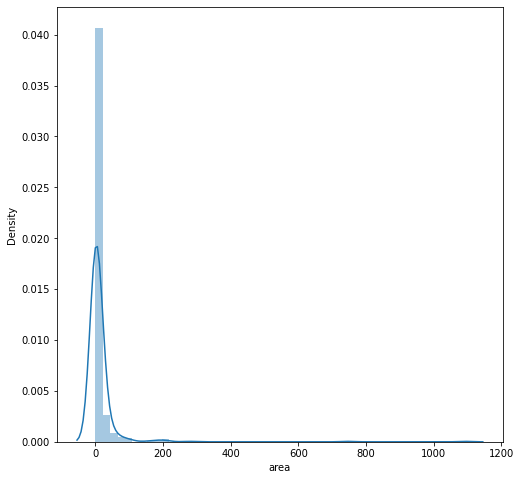

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.distplot(df_forest['area']);

In [ ]:
# Reducing the Right Skewness of the Area using log(n) + 1
df_forest['u_area'] = np.log(df_forest['area'] + 1)

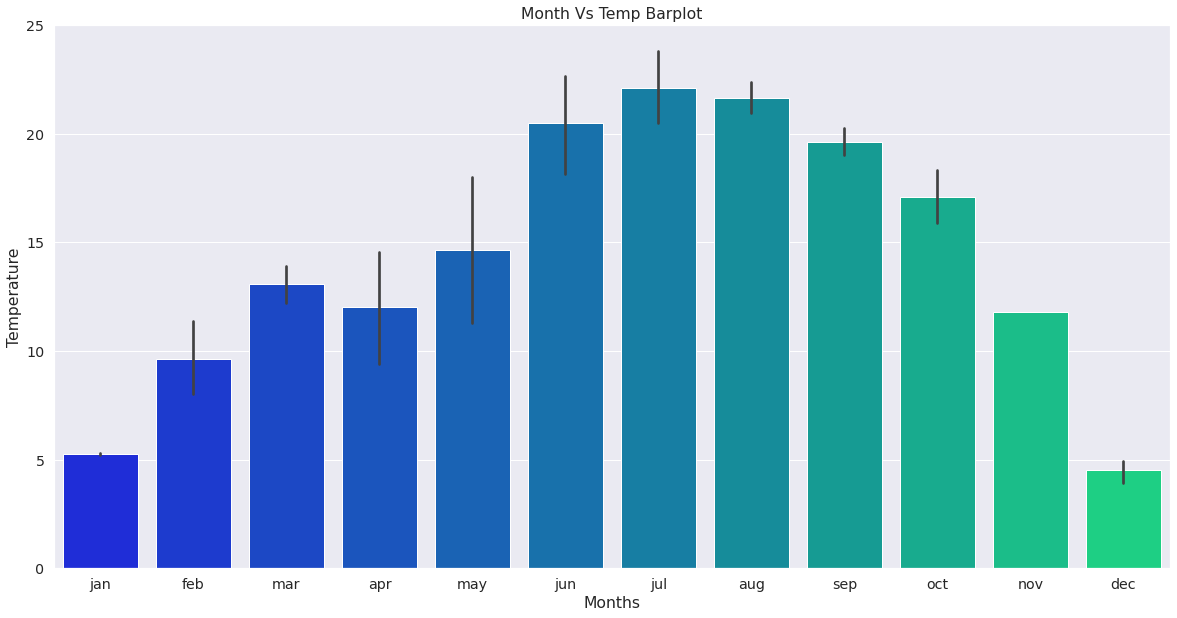

In [ ]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = df_forest,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [ ]:
df_forest.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

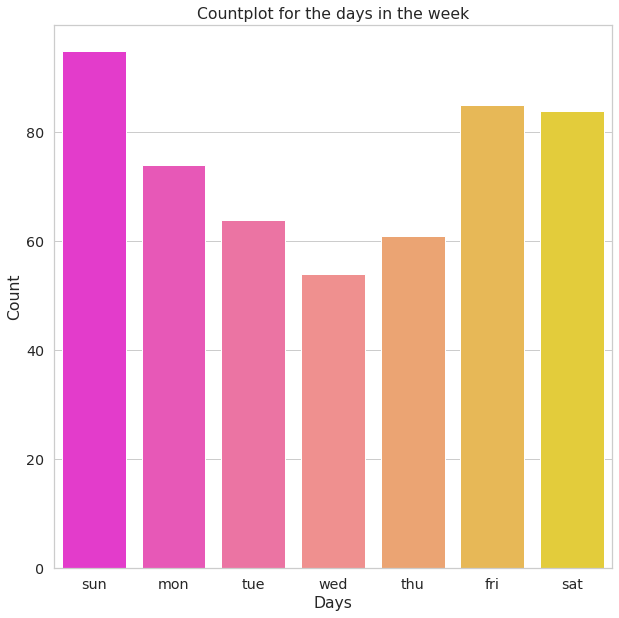

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(df_forest['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

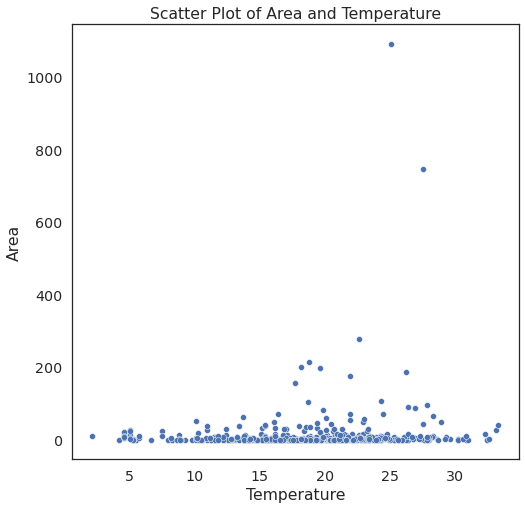

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

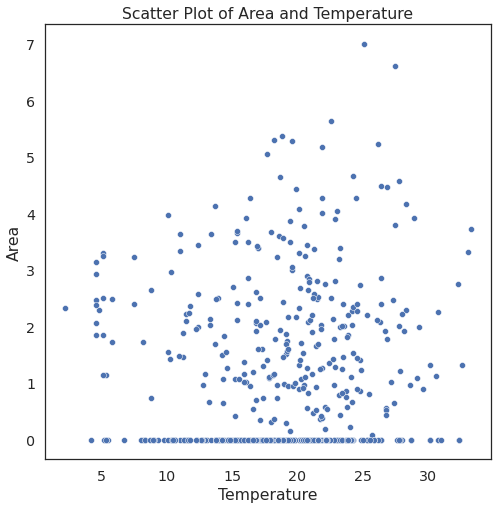

In [ ]:
# After Reducing the Skewness
plt.rcParams['figure.figsize'] = [8, 8]
sns.set(style = "white", font_scale = 1.3)
scat = sns.scatterplot(df_forest['temp'], df_forest['u_area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

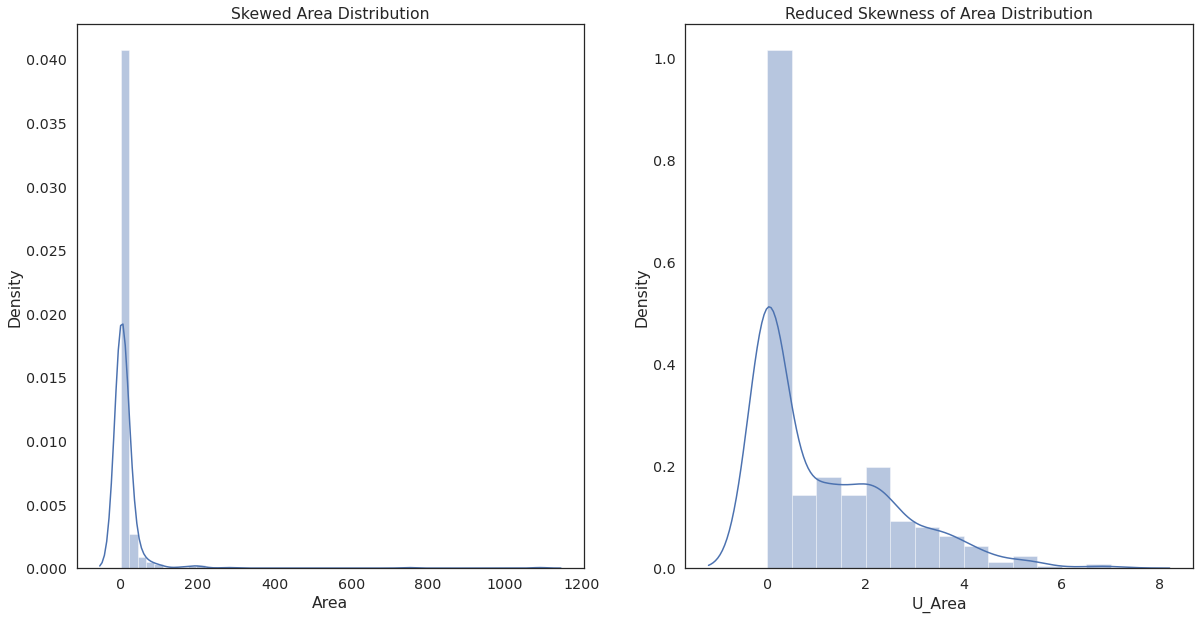

In [ ]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sns.distplot(df_forest['area'], ax = ax[0]);
area_dist_2 = sns.distplot(df_forest['u_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "U_Area", ylabel = "Density");

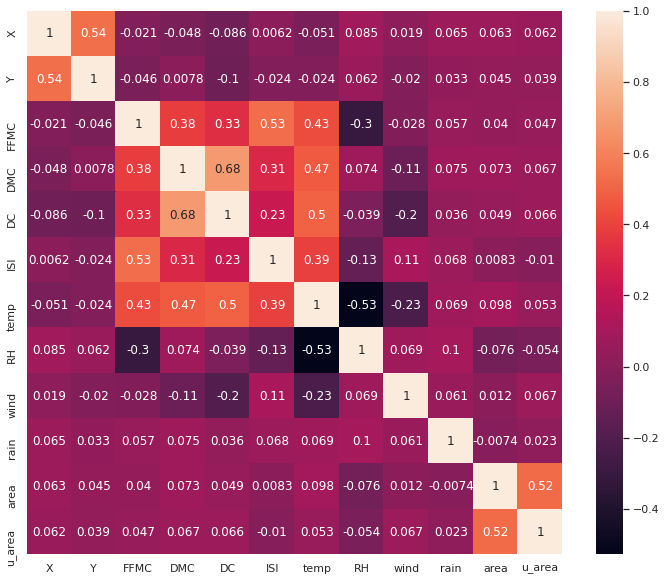

In [ ]:
# Correlation Heatmap of the features in the dataset
plt.rcParams['figure.figsize'] = [12, 10]
sns.set(font_scale = 1)
sns.heatmap(df_forest.corr(), annot = True);

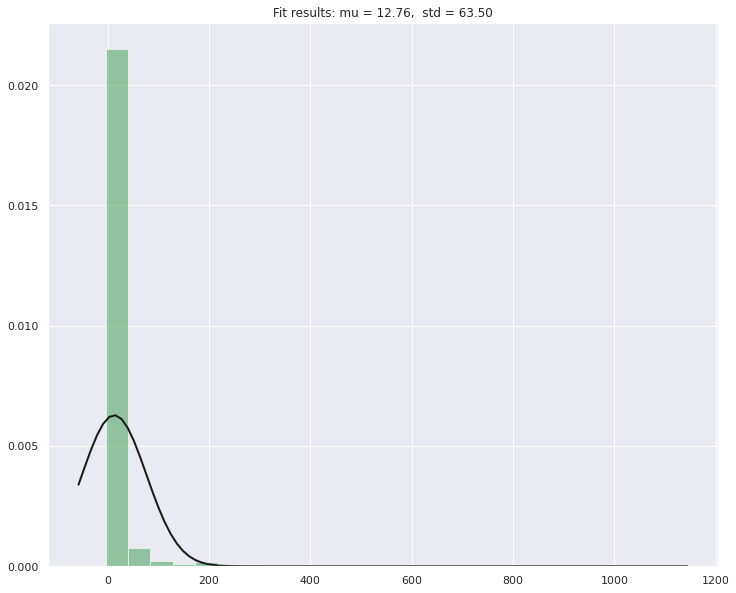

In [ ]:
data = norm.rvs(df_forest['area'])

# Fit a normal distribution to the data
mu, std = norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [ ]:
# Reducing the skewness for the final training and dropping u_area
df_forest['area'] = np.log(df_forest['area'] + 1)
df_forest.drop(columns = 'u_area', inplace = True)

display(df_forest)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000


In [ ]:
# Normalization of the features
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
df_forest['FFMC'] = minmax.fit_transform(np.array(df_forest['FFMC']).reshape(-1, 1))
df_forest['DMC'] = minmax.fit_transform(np.array(df_forest['DMC']).reshape(-1, 1))
df_forest['DC'] = minmax.fit_transform(np.array(df_forest['DC']).reshape(-1, 1))
df_forest['ISI'] = minmax.fit_transform(np.array(df_forest['ISI']).reshape(-1, 1))
df_forest['RH'] = minmax.fit_transform(np.array(df_forest['RH']).reshape(-1, 1))

In [ ]:
df_forest['day'].value_counts()

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [ ]:
df_forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,0.928318,0.378264,0.633329,0.160814,18.889168,0.344567,4.017602,0.021663,1.111026
std,2.313778,1.229900,0.071227,0.220698,0.290918,0.081274,5.806625,0.191970,1.791653,0.295959,1.398436
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.200000,0.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,0.922581,0.232598,0.504046,0.115865,15.500000,0.211765,2.700000,0.000000,0.000000
50%,4.000000,4.000000,0.940645,0.369400,0.769673,0.149733,19.300000,0.317647,4.000000,0.000000,0.418710
75%,7.000000,5.000000,0.957419,0.486906,0.827958,0.192513,22.800000,0.447059,4.900000,0.000000,2.024193
max,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,33.300000,1.000000,9.400000,6.400000,6.995620


In [ ]:
# Changing categorical values into numerical values

# Months
df_forest['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
df_forest['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

# # Using Label Encoder for cat to num conversion
# categorical = list(df_forest.select_dtypes(include = ["object"]).columns)
# for i, column in enumerate(categorical) :
#     label = LabelEncoder()
#     df_forest[column] = label.fit_transform(df_forest[column])

df_forest.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.0
1,7,4,10,3,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.0
2,7,4,10,7,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.0
3,8,6,3,6,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.0
4,8,6,3,1,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.0
5,8,6,8,1,0.949677,0.290145,0.563035,0.262032,22.2,0.164706,5.4,0.0,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0,0.0
7,8,6,8,2,0.939355,0.497243,0.703999,0.190731,8.0,0.835294,2.2,0.0,0.0
8,8,6,9,3,0.932903,0.442453,0.802979,0.124777,13.1,0.564706,5.4,0.0,0.0
9,7,5,9,7,0.952258,0.299449,0.810015,0.126560,22.8,0.294118,4.0,0.0,0.0


In [ ]:
target = df_forest['area']
features = df_forest.drop(columns = 'area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 196)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 12)
Test data set size :  (78, 12)


In [ ]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
344,6,3,9,2,0.939355,0.444521,0.937258,0.133690,12.2,0.600000,4.9,0.0
6,8,6,8,2,0.949677,0.302550,0.571948,0.151515,24.1,0.141176,3.1,0.0
485,2,4,8,2,0.984516,0.463129,0.690043,0.379679,30.6,0.152941,3.6,0.0
419,2,5,8,1,0.940645,0.620951,0.709628,0.135472,24.8,0.247059,4.0,0.0
263,6,3,8,6,0.934194,0.482426,0.728509,0.126560,19.3,0.282353,3.6,0.0


In [ ]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))

Mean Squared Error :  1.6721913684845617
r2 Score :  -0.002195214621955932


In [ ]:
# Transforming data
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)

# Predictions
predictions_poly = model_2.predict(poly_X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))
print ("r2 Score : ", r2_score(y_test, predictions_poly))

Mean Squared Error :  421.21960520565
r2 Score :  -251.44973786978935


In [ ]:
# Lasso regression
model_3 = Lasso(alpha = 100, max_iter = 10000) 
model_3.fit(X_train, y_train)

# Predictions
prediction = model_3.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


In [ ]:
# Ridge Regression
model_4 = Ridge(alpha = 500)
model_4.fit(X_train, y_train)

# Predictions
pred = model_4.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred))
print ("r2 Score : ", r2_score(y_test, pred))

Mean Squared Error :  1.6992124069124952
r2 Score :  -0.018389745892101628


In [ ]:
# ElasticNet
model_5 = ElasticNet(alpha = 100, max_iter = 10000)
model_5.fit(X_train, y_train)

# Predictions
pred1 = model_5.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred1))
print ("r2 Score : ", r2_score(y_test, pred1))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


In [ ]:
# SVR
model_6 = SVR(C = 100, kernel = 'linear')
model_6.fit(X_train, y_train)

# Predictions
prediction = model_6.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.9438843129613104
r2 Score :  -0.16502907080189222


In [ ]:
prediction = np.exp(prediction - 1)
prediction

array([1.07430026, 1.20602584, 0.88806814, 0.70026497, 0.72402899,
       0.35771428, 0.49760699, 0.5495198 , 0.65923499, 0.49565238,
       0.57488241, 0.42393599, 0.83828004, 0.68941229, 0.77419022,
       0.67081496, 0.5845863 , 0.55275376, 0.68173631, 0.59163588,
       0.64477304, 0.47628081, 0.4868727 , 0.53021471, 0.40018252,
       0.93568216, 0.69702682, 0.54804045, 0.59001395, 0.66580917,
       0.38215993, 0.82739529, 0.44258074, 0.55798921, 0.744611  ,
       0.64512153, 0.62405289, 0.79366404, 0.4759426 , 0.44875102,
       0.61535839, 0.59980373, 0.53220693, 0.60937925, 0.45044518,
       0.48904423, 0.57248807, 0.59524461, 0.67297528, 0.55410715,
       0.70003425, 0.44399281, 0.75593877, 0.64342416, 0.53893789,
       1.0378254 , 0.50381758, 0.85042927, 0.59238181, 0.39743214,
       0.91739619, 0.5344275 , 0.54360829, 0.92565755, 0.410699  ,
       0.61442377, 0.64903433, 0.61110732, 0.67627206, 0.80578832,
       0.48828093, 0.6482756 , 0.68139917, 0.60179753, 1.93767